# Task 1: Data Handling

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For better aesthetics
sns.set(style="dark")
sns.set_palette("tab10")
%matplotlib inline

# Load the datasets
data_changping = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
data_huairou = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")

# Concatenate the two datasets
data = pd.concat([data_changping, data_huairou], ignore_index=True)

# Show the first few rows
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


# Task 2: EDA

## Task 2a: Fundamental Data Understanding

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,70128.0,17532.500000,10122.177085,1.0000,8766.75,17532.5,26298.25,35064.0
year,70128.0,2014.662560,1.177205,2013.0000,2014.00,2015.0,2016.00,2017.0
month,70128.0,6.522930,3.448728,1.0000,4.00,7.0,10.00,12.0
day,70128.0,15.729637,8.800155,1.0000,8.00,16.0,23.00,31.0
hour,70128.0,11.500000,6.922236,0.0000,5.75,11.5,17.25,23.0
PM2.5,68401.0,70.364983,71.782734,2.0000,18.00,46.0,99.00,882.0
PM10,68769.0,93.074782,83.380418,2.0000,31.00,70.0,131.00,999.0
SO2,68520.0,13.547517,20.018705,0.2856,2.00,5.0,16.00,315.0
NO2,67822.0,38.423399,28.668603,1.0265,17.00,31.0,54.00,231.0
CO,67185.0,1087.332351,1008.029758,100.0000,500.00,800.0,1400.00,10000.0


In [ ]:
data.describe(include='object').T

In [3]:
data.shape

(70128, 18)

In [4]:
data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5      1727
PM10       1359
SO2        1608
NO2        2306
CO         2943
O3         1755
TEMP        104
PRES        103
DEWP        106
RAIN        106
wd          442
WSPM         92
station       0
dtype: int64

In [5]:
# Check percentage of missing values
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.462640
PM10       1.937885
SO2        2.292950
NO2        3.288273
CO         4.196612
O3         2.502567
TEMP       0.148300
PRES       0.146874
DEWP       0.151152
RAIN       0.151152
wd         0.630276
WSPM       0.131189
station    0.000000
dtype: float64


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
import pandas as pd

def count_outliers(data, columns):
    outlier_counts = {}

    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers (values outside the bounds)
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]

    # Convert the outlier counts into a DataFrame
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Pollutant', 'Outlier Count'])
    return outlier_df

# Specify the columns (pollutants)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Get the count of outliers per column
outliers_per_column = count_outliers(data, pollutants)

# Print out the DataFrame with the number of outliers per column
outliers_per_column

,Pollutant,Outlier Count
0,PM2.5,3347
1,PM10,2358
2,SO2,6581
3,NO2,1677
4,CO,4036
5,O3,3170


## Task 2b: Data Preprocessing

In [8]:
data = data.dropna()

In [9]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

cols = ['datetime'] + [col for col in data.columns if col != 'datetime']
data = data[cols]

data = data.drop(columns=['No', 'year', 'month', 'day', 'hour'])

In [10]:
data.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


## Task 2c: Statistical Summary & Visualisation

### Univariate

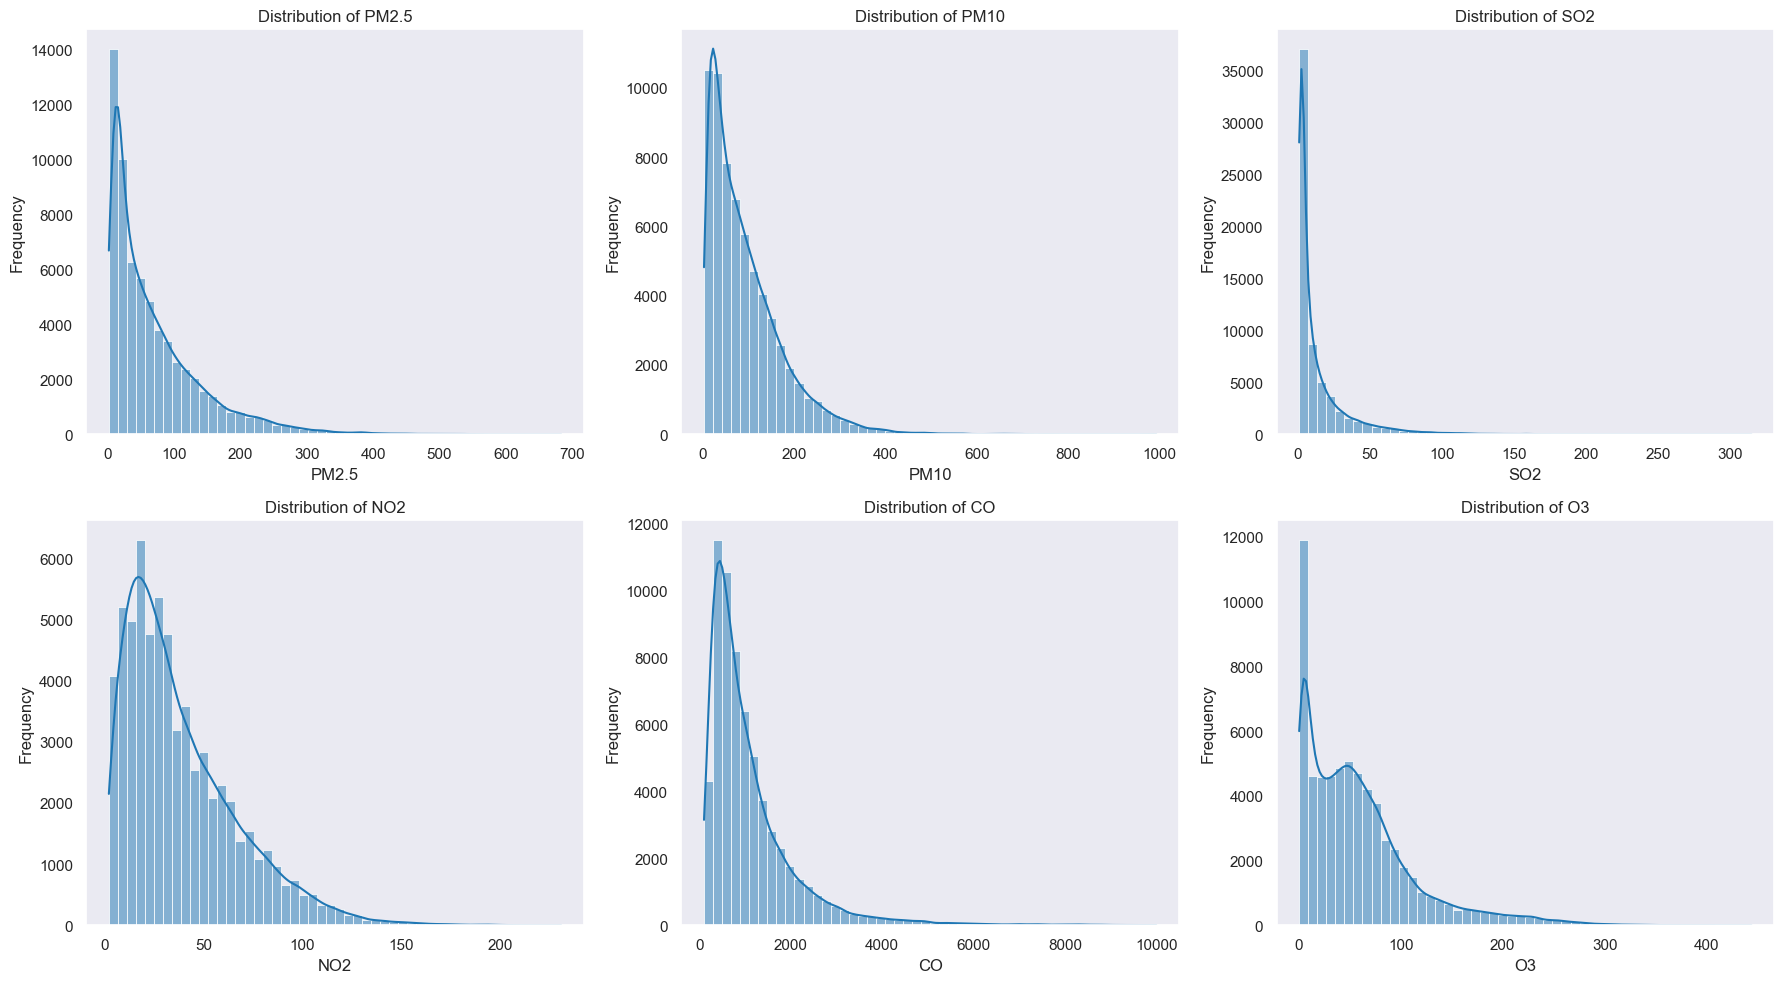

In [11]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, pollutant in enumerate(pollutants):
    row = i // 3
    col = i % 3
    sns.histplot(data[pollutant], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {pollutant}')
    axes[row, col].set_xlabel(pollutant)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

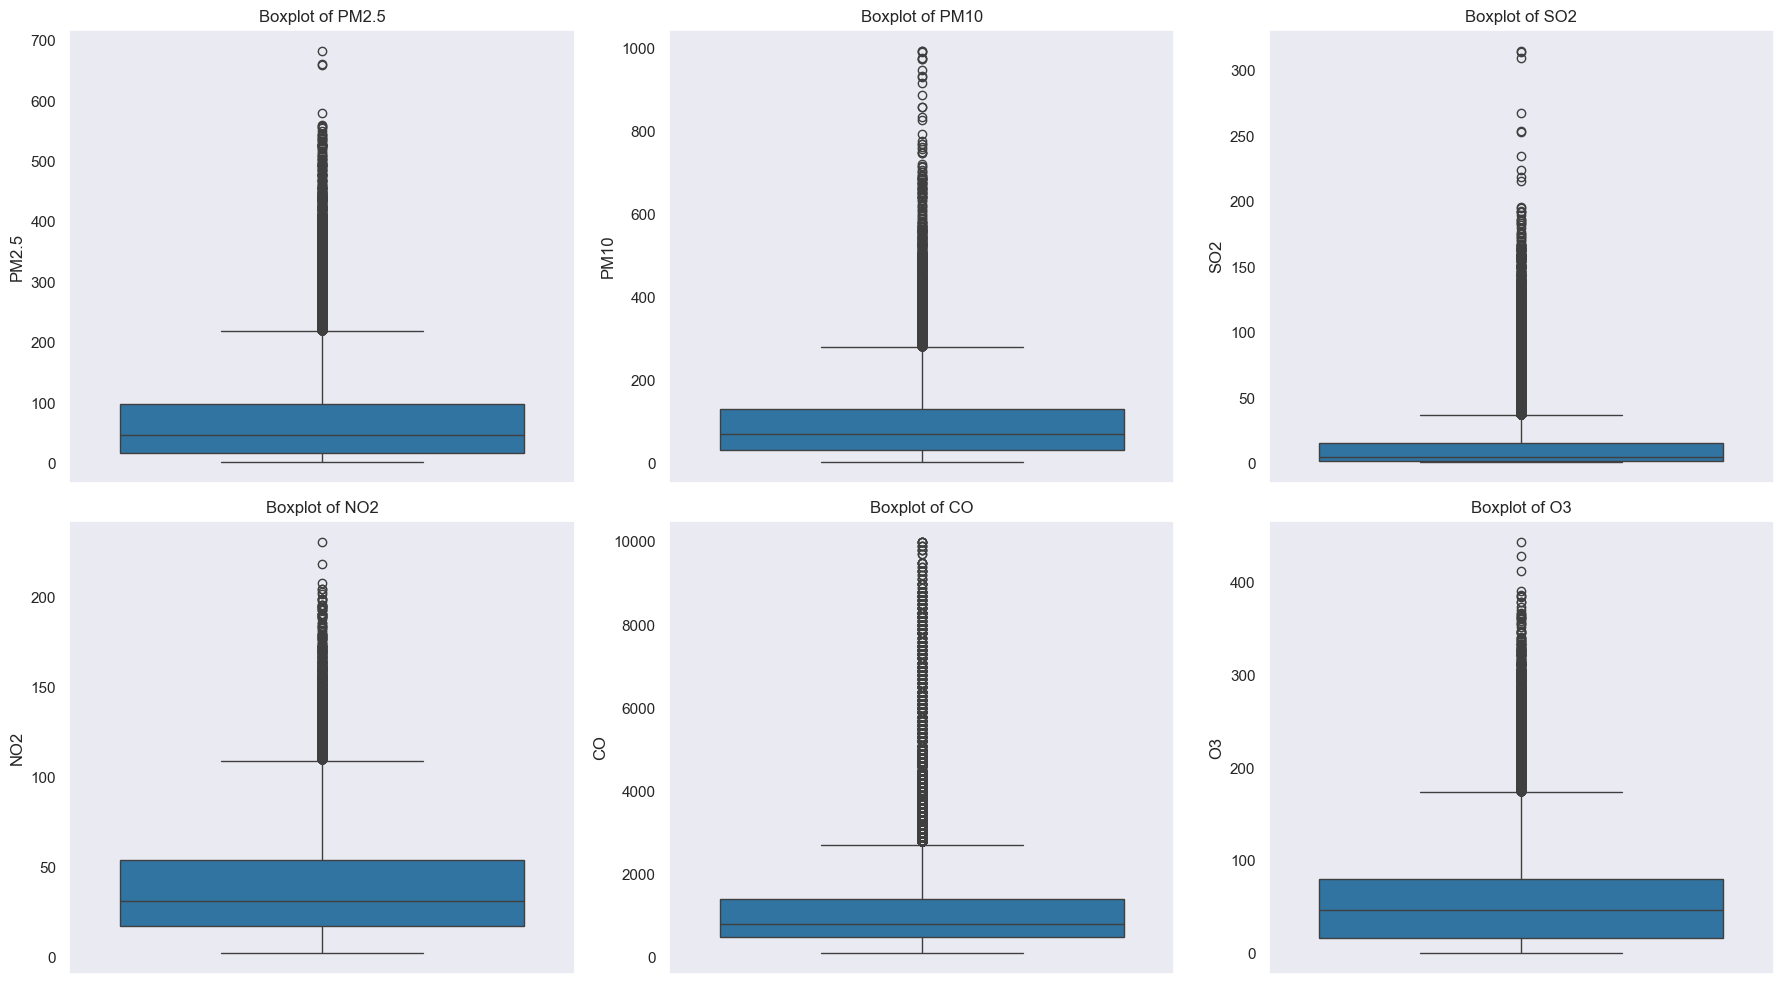

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, pollutant in enumerate(pollutants):
    row = i // 3
    col = i % 3
    sns.boxplot(y=data[pollutant], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {pollutant}')
    axes[row, col].set_ylabel(pollutant)

plt.tight_layout()
plt.show()

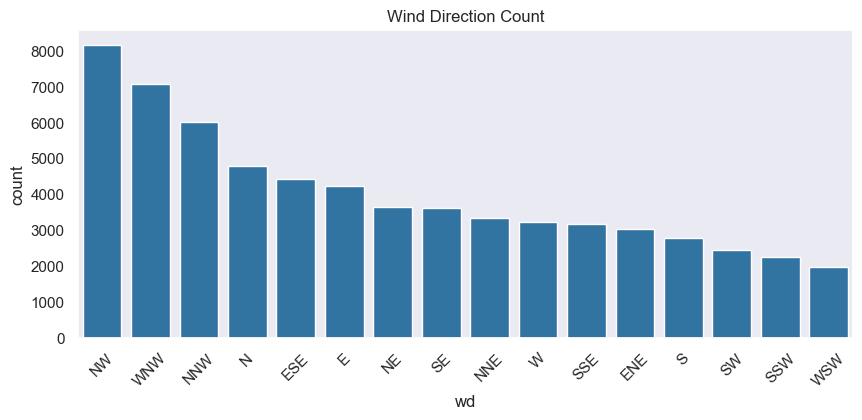

In [13]:
plt.figure(figsize=(10, 4))
sns.countplot(x='wd', data=data, order=data['wd'].value_counts().index)
plt.title('Wind Direction Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate

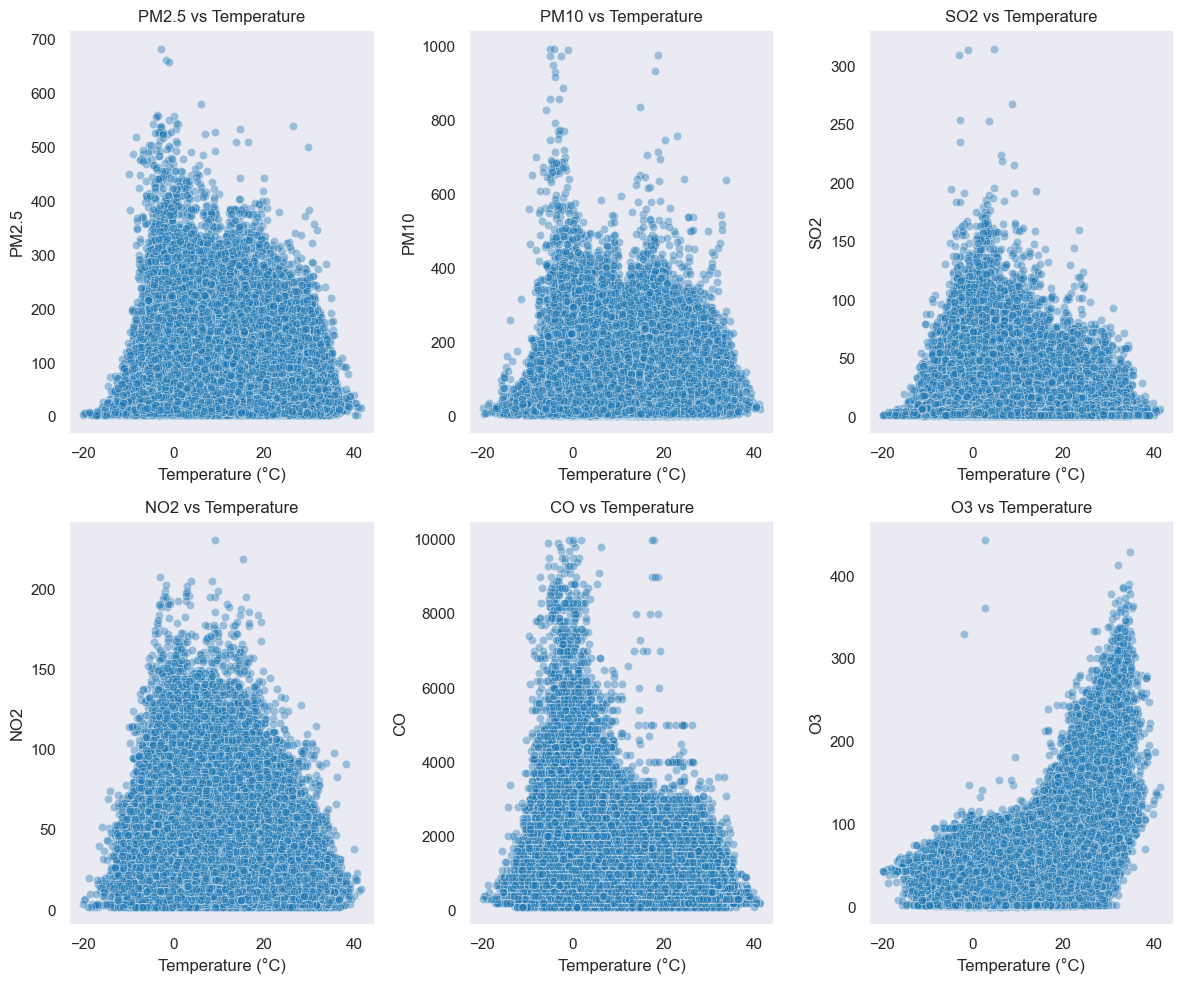

In [14]:
# Create a grid layout with 2 rows and 2 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()
for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x='TEMP', y=pollutant, data=data, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'{pollutant} vs Temperature')
    axes[i].set_xlabel('Temperature (°C)')
    axes[i].set_ylabel(pollutant)
plt.tight_layout()
plt.show()

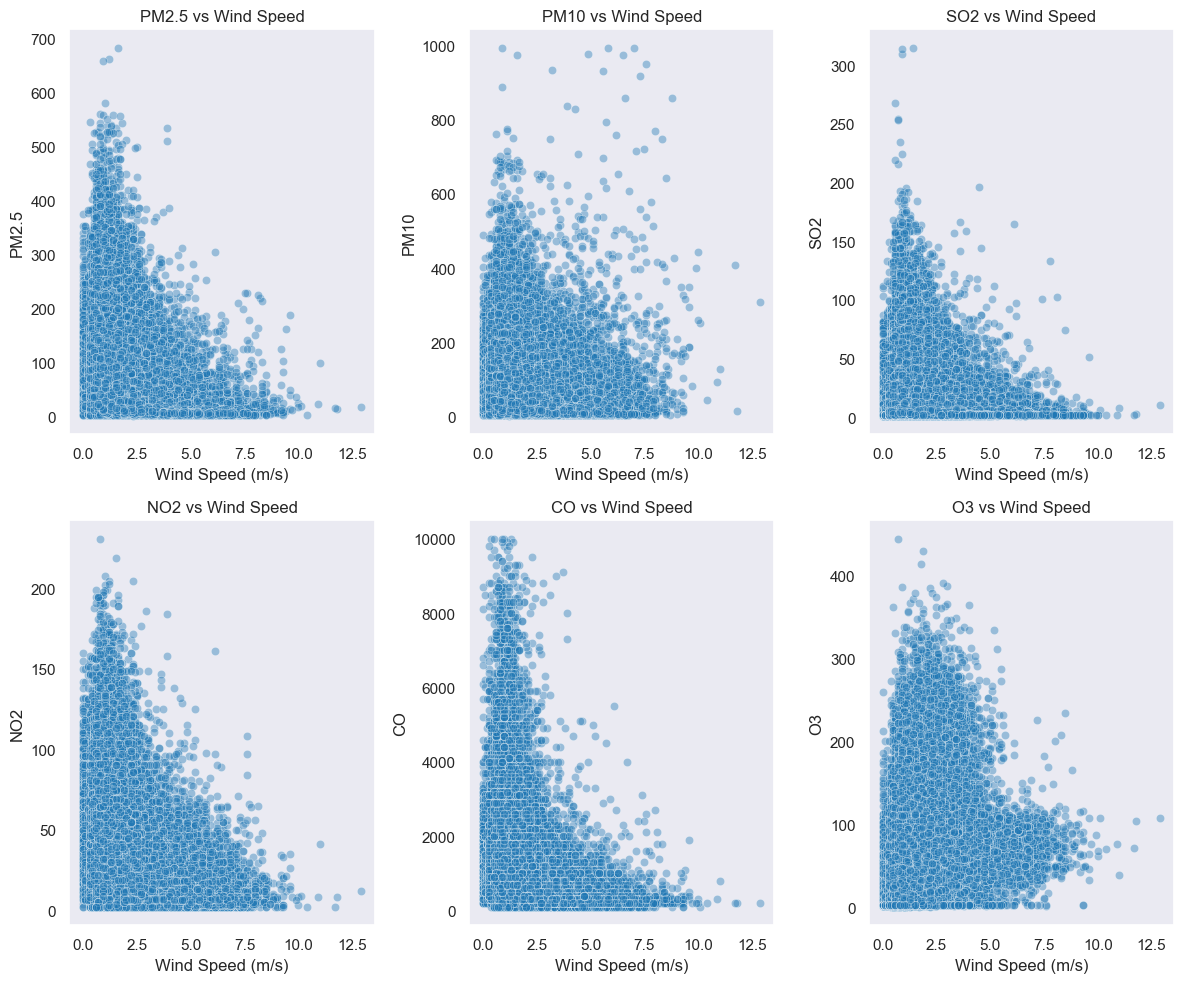

In [15]:
# Create a grid layout with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()
for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x='WSPM', y=pollutant, data=data, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'{pollutant} vs Wind Speed')
    axes[i].set_xlabel('Wind Speed (m/s)')
    axes[i].set_ylabel(pollutant)
plt.tight_layout()
plt.show()

### Multivariate

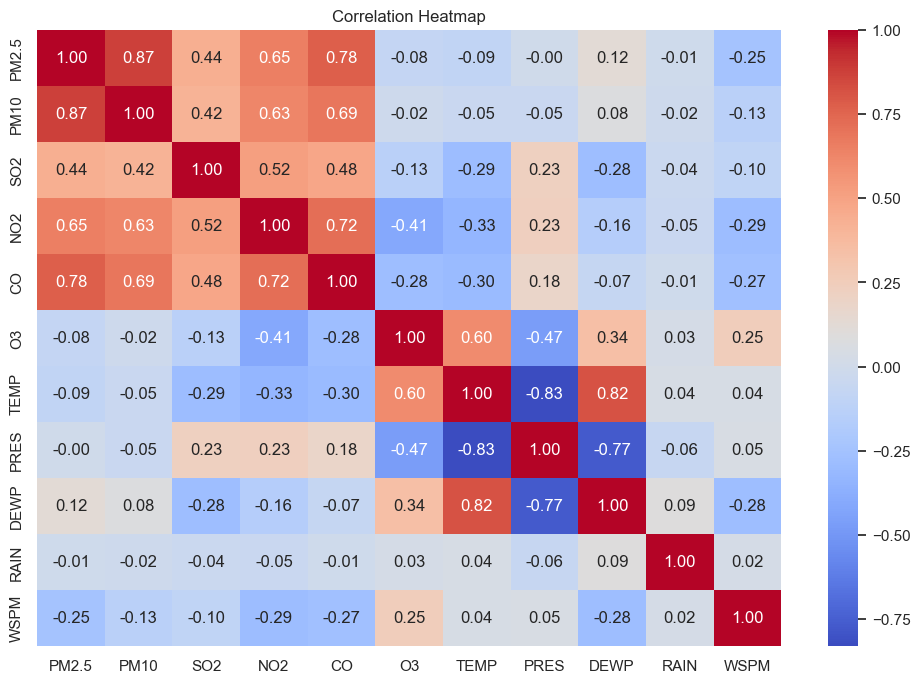

In [16]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

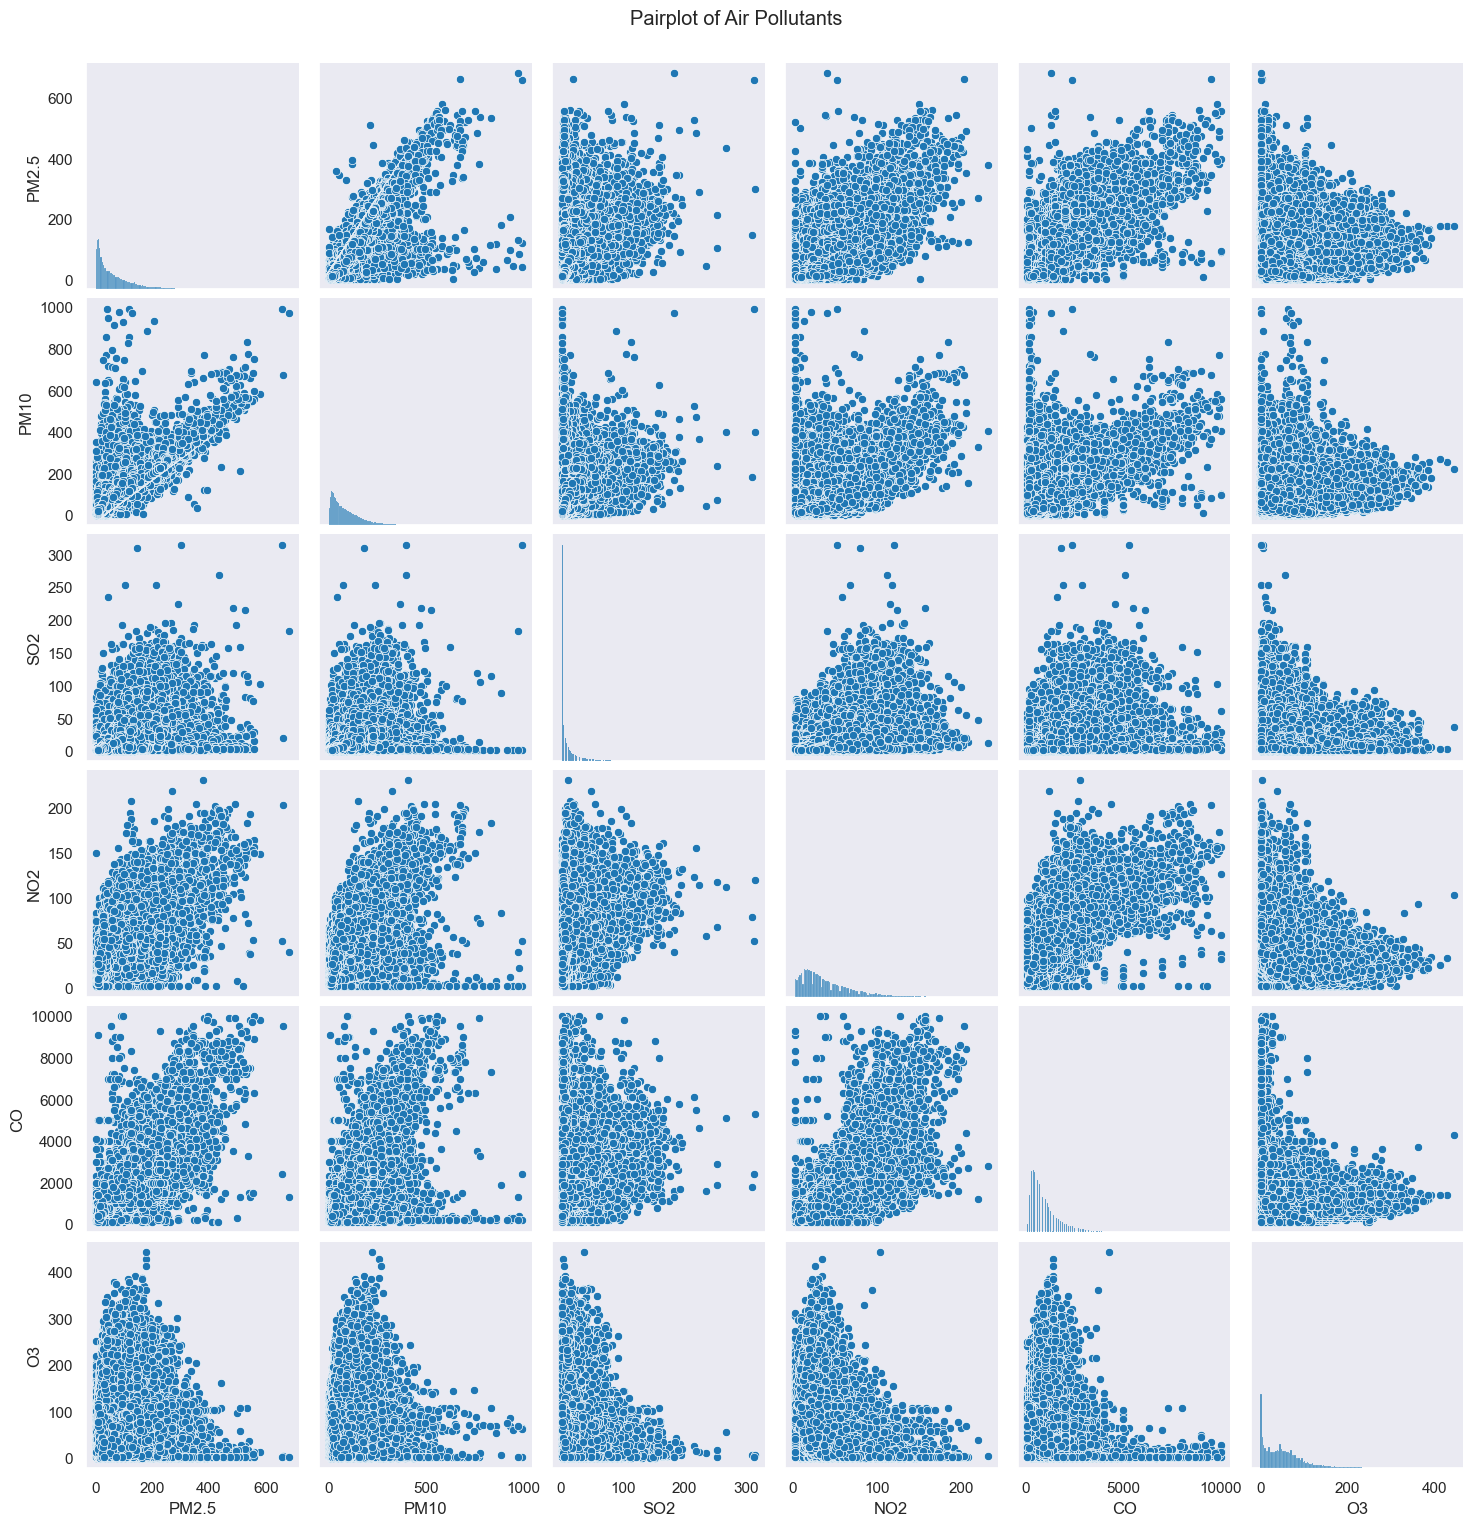

In [17]:
subset = data[pollutants]
sns.pairplot(subset)
plt.suptitle('Pairplot of Air Pollutants', y=1.02)
plt.show()

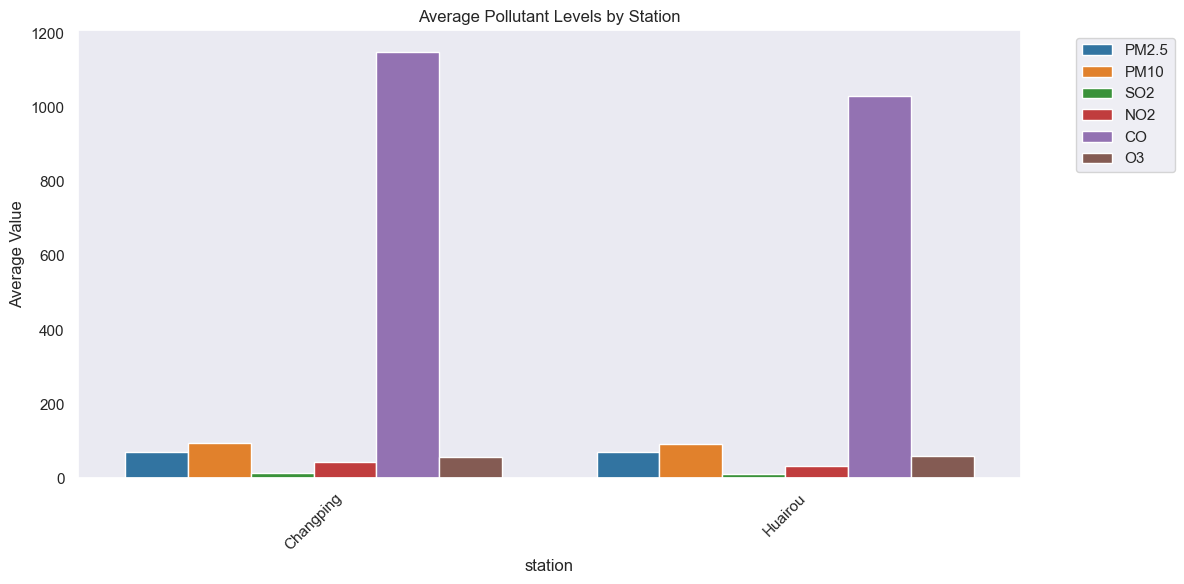

In [ ]:
station_avg = data.groupby('station')[pollutants].mean().reset_index()
station_avg_melted = pd.melt(station_avg, id_vars='station', var_name='Pollutant', value_name='Average Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='Average Value', hue='Pollutant', data=station_avg_melted)
plt.title('Average Pollutant Levels by Station')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

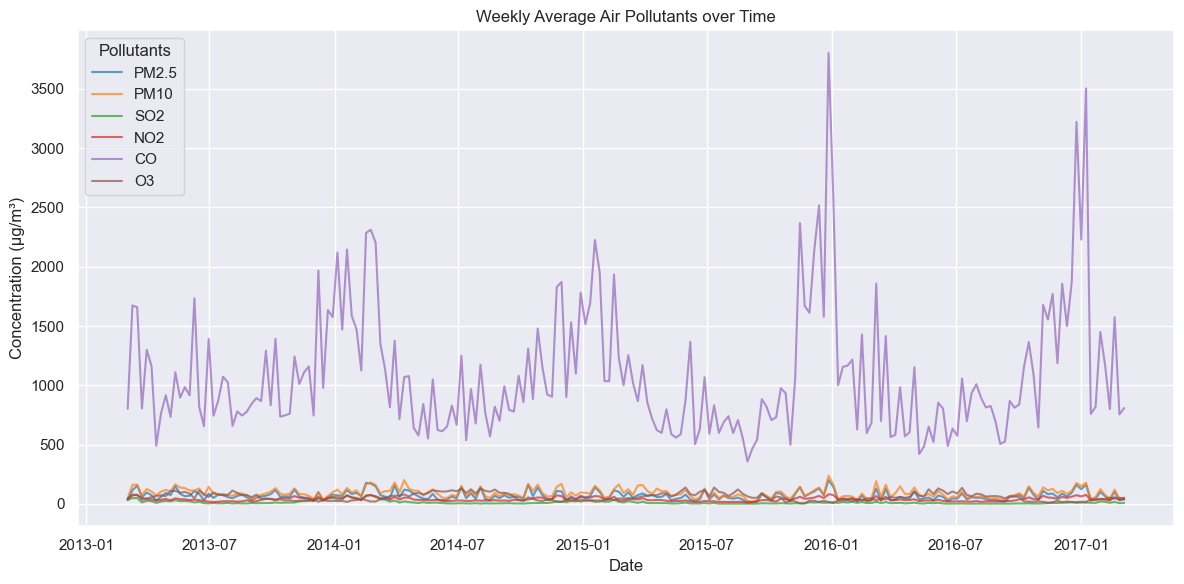

In [19]:
# Set the datetime column as the index
data_ts = data.set_index('datetime')
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    weekly_data = data_ts[pollutant].resample('W').mean()
    plt.plot(weekly_data, label=f'{pollutant}', alpha=0.7)
plt.title('Weekly Average Air Pollutants over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (μg/m³)')
plt.legend(title='Pollutants')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3: Model Building

In [20]:
# Importing libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [21]:
# Handling missing data with SimpleImputer (median for numeric features)
imputer = SimpleImputer(strategy='median')

# Identify numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Apply imputer on numeric columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Feature scaling (Standardization) for numeric features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Encoding categorical features
encoder = LabelEncoder()
data['wd'] = encoder.fit_transform(data['wd'])
data['station'] = encoder.fit_transform(data['station'])

In [22]:
random_state = 42

# We will use all columns for this example, but you can experiment with dropping unnecessary columns.
X = data.drop(columns=['PM2.5', 'datetime'])  # Drop unnecessary columns
y = data['PM2.5']  # PM2.5 is the target variable (you may choose other pollutants)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [23]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=random_state)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluation: Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 0.07188179050433453
R-Squared: 0.9290296695907116


C:\Users\sutir\AppData\Local\Temp\ipykernel_15640\3518748048.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


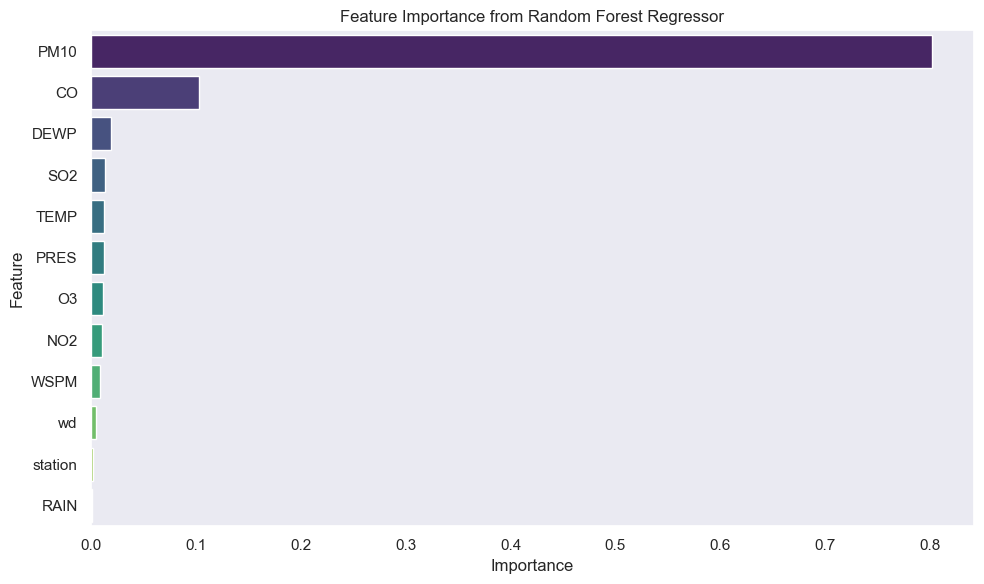

In [24]:
# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()